size.csv
[0.         0.         0.         0.15296927 0.84703073]
bm.csv
[0.32290193 0.310345   0.18563598 0.18111709 0.        ]
prof.csv
[1.38777878e-17 1.85879099e-01 1.87256829e-01 2.78968917e-01
 3.47895154e-01]
inv.csv
[0.2 0.2 0.2 0.2 0.2]
mom.csv
[0.         0.19601628 0.26756899 0.30151657 0.23489817]


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/707820524.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/707820524.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/707820524.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/707820524.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/707820524.py:7: FutureWarning: Da

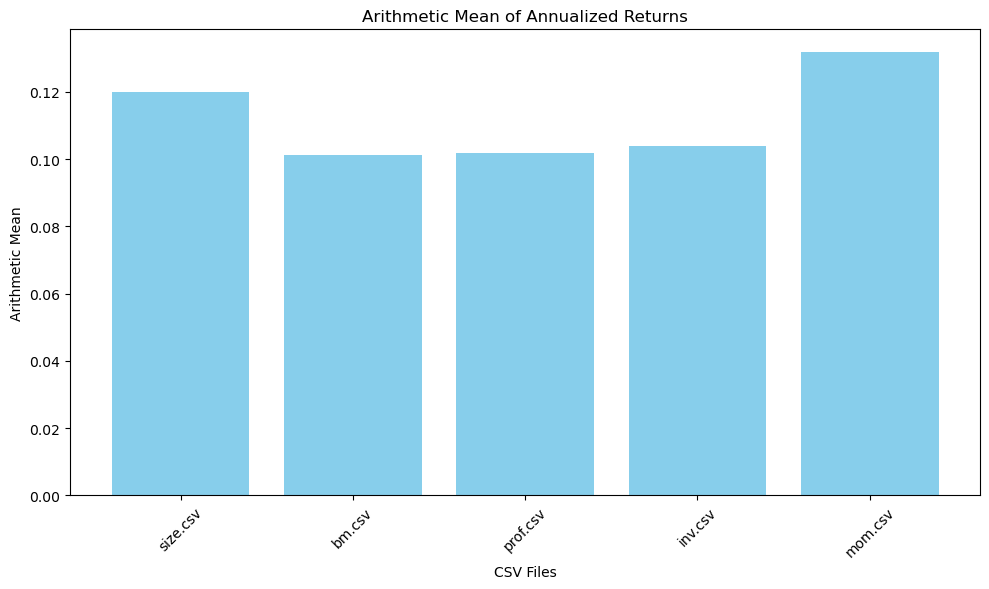

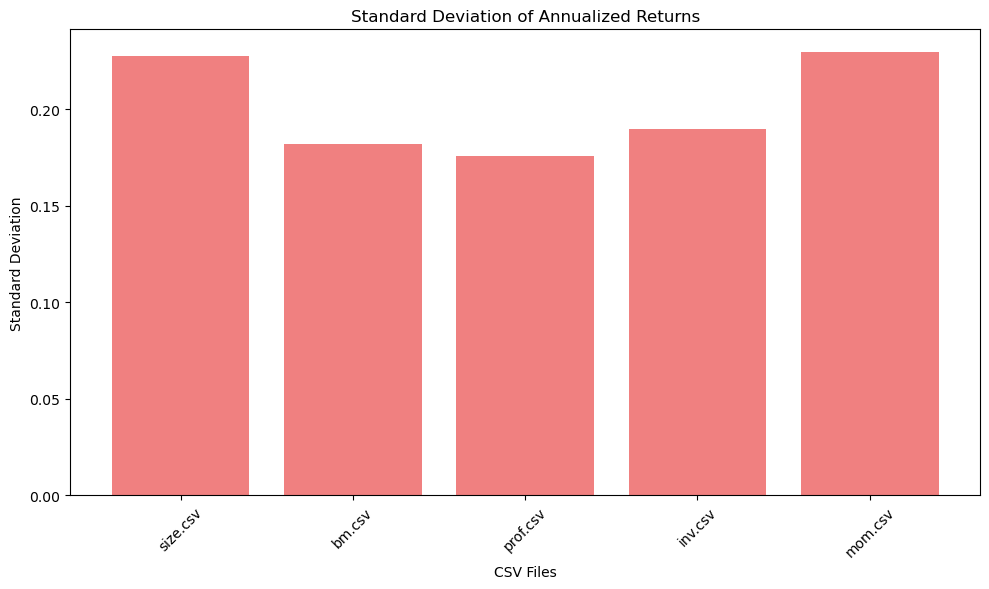

In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
def calculate_weights(file_path):
    data = pd.read_csv(file_path, header=None)
    data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
    covariance = data.cov()
    num_assets = len(covariance)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    result = minimize(lambda w: w.T @ covariance @ w, initial_guess,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x
def annualized_returns_for_periods(data, weights):
    monthly_portfolio_returns = (data * weights).sum(axis=1)
    # Reshape data to have 12 months per row for full years only
    full_year_periods = len(monthly_portfolio_returns) // 12
    monthly_portfolio_returns = monthly_portfolio_returns[:full_year_periods * 12]
    monthly_portfolio_returns = monthly_portfolio_returns.values.reshape(full_year_periods, 12)
    # Calculate compounded annual return for each 12-month period
    annual_returns = (np.prod(1 + monthly_portfolio_returns, axis=1) - 1)
    return annual_returns
files = ['size.csv', 'bm.csv', 'prof.csv', 'inv.csv', 'mom.csv']
annualized_means = {}
annualized_std_devs = {}
for file in files:
    file_path = f'{file}'
    weights = calculate_weights(file_path)
    data = pd.read_csv(file_path, header=None)
    data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
    annual_returns = annualized_returns_for_periods(data, weights)
    annualized_means[file] = np.mean(annual_returns)
    annualized_std_devs[file] = np.std(annual_returns)
    print(file_path)
    print(weights)
plt.figure(figsize=(10, 6))
plt.bar(range(len(annualized_means)), list(annualized_means.values()), tick_label=list(annualized_means.keys()), color='skyblue')
plt.title('Arithmetic Mean of Annualized Returns')
plt.ylabel('Arithmetic Mean')
plt.xlabel('CSV Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(range(len(annualized_std_devs)), list(annualized_std_devs.values()), tick_label=list(annualized_std_devs.keys()), color='lightcoral')
plt.title('Standard Deviation of Annualized Returns')
plt.ylabel('Standard Deviation')
plt.xlabel('CSV Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

size.csv
[ 0.10713648 -0.33372644 -0.0715344   0.29812436  1.        ]
bm.csv
[ 0.71084817  0.65899443  0.14110336  0.12256108 -0.63350705]
prof.csv
[-0.88543698  0.12506631  0.13242446  0.62794621  1.        ]
inv.csv
[0.2 0.2 0.2 0.2 0.2]
mom.csv
[-0.4904248   0.18731114  0.43329976  0.54995624  0.31985766]


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/3704588158.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/3704588158.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/3704588158.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/3704588158.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_61669/3704588158.py:7: FutureWarnin

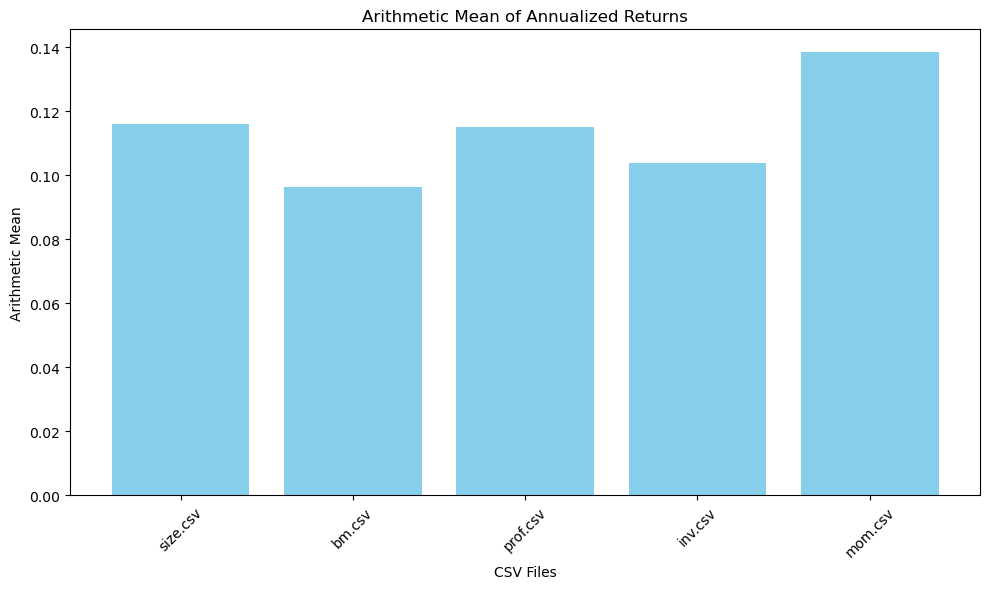

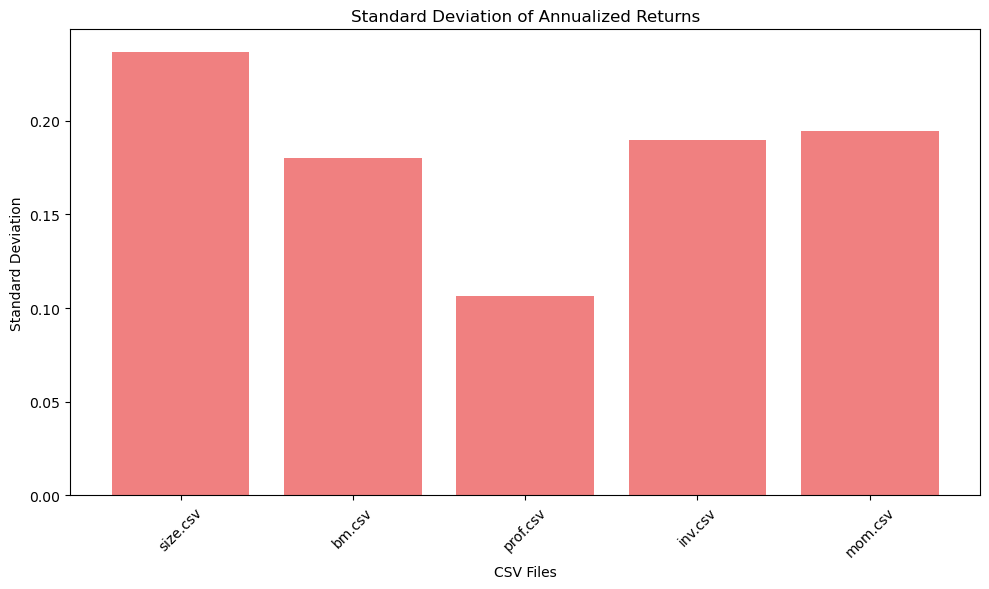

In [16]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
def calculate_weights(file_path):
    data = pd.read_csv(file_path, header=None)
    data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
    covariance = data.cov()
    num_assets = len(covariance)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    result = minimize(lambda w: w.T @ covariance @ w, initial_guess,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x
def annualized_returns_for_periods(data, weights):
    monthly_portfolio_returns = (data * weights).sum(axis=1)
    # Reshape data to have 12 months per row for full years only
    full_year_periods = len(monthly_portfolio_returns) // 12
    monthly_portfolio_returns = monthly_portfolio_returns[:full_year_periods * 12]
    monthly_portfolio_returns = monthly_portfolio_returns.values.reshape(full_year_periods, 12)
    # Calculate compounded annual return for each 12-month period
    annual_returns = (np.prod(1 + monthly_portfolio_returns, axis=1) - 1)
    return annual_returns
files = ['size.csv', 'bm.csv', 'prof.csv', 'inv.csv', 'mom.csv']
annualized_means = {}
annualized_std_devs = {}
for file in files:
    file_path = f'{file}'
    weights = calculate_weights(file_path)
    data = pd.read_csv(file_path, header=None)
    data = data.applymap(lambda x: float(x.strip('%')) / 100.0)
    annual_returns = annualized_returns_for_periods(data, weights)
    annualized_means[file] = np.mean(annual_returns)
    annualized_std_devs[file] = np.std(annual_returns)
    print(file_path)
    print(weights)
plt.figure(figsize=(10, 6))
plt.bar(range(len(annualized_means)), list(annualized_means.values()), tick_label=list(annualized_means.keys()), color='skyblue')
plt.title('Arithmetic Mean of Annualized Returns')
plt.ylabel('Arithmetic Mean')
plt.xlabel('CSV Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(range(len(annualized_std_devs)), list(annualized_std_devs.values()), tick_label=list(annualized_std_devs.keys()), color='lightcoral')
plt.title('Standard Deviation of Annualized Returns')
plt.ylabel('Standard Deviation')
plt.xlabel('CSV Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()